<a href="https://colab.research.google.com/github/intheblueside/House-Pricing-DataSet/blob/main/housePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB WORK 1 

Name: Ishwari A/P S.Manickavasagam

Matrix No: 22004773


PART 1

Data Analysis

In [ ]:
#importing neccessary modules
import pandas as pd; #data processing
import numpy as np; # arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
import unittest
from termcolor import colored as cl # text custom

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import metrics

import random
random.seed(0)

In [ ]:
#importing dataset
url = 'https://raw.githubusercontent.com/intheblueside/House-Pricing-DataSet/main/House%20Pricing.csv';
dataset = pd.read_csv(url)

#display top of dataframe
dataset.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#see colum data types and non-missing values
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


PART 2

Data Preprocessing

In [ ]:
# drop null values
dataset.dropna(inplace=True)
print(cl(dataset.isnull().sum(), attrs = ['bold']))


In [ ]:

lb = LabelEncoder()
dataset['mainroad'] = lb.fit_transform(dataset['mainroad'])
dataset['guestroom'] = lb.fit_transform(dataset['guestroom'])
dataset['basement'] = lb.fit_transform(dataset['basement'])
dataset['hotwaterheating'] = lb.fit_transform(dataset['hotwaterheating'])
dataset['airconditioning'] = lb.fit_transform(dataset['airconditioning'])
dataset['prefarea'] = lb.fit_transform(dataset['prefarea'])
dataset['furnishingstatus'] = lb.fit_transform(dataset['furnishingstatus'])


In [ ]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
#check all data types after handling categorized data (yes/no = 1/0)
print(cl(dataset.dtypes))

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object


In [ ]:
#fill missing values with 0
dataset = dataset.fillna(0)
dataset

In [ ]:
#see statistical data
dataset.describe()

In [ ]:
#check again if any data type is in double
# linear regression only supports int type
print(cl(dataset.dtypes))

In [ ]:
#heatmap plot to see relation between two variables in a dataset
#using seaborn package
sb.heatmap(dataset.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

In [ ]:
#visualize data
cols = ['price', 'area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom',
        'stories', 'airconditioning']
sb.pairplot(dataset[cols], height = 4)

In [ ]:
#visualize data using distribution plot between price and area
sb.histplot(dataset['price'], color='r')
plt.title('House Price Distribution', fontsize = 12)
plt.xlabel('price', fontsize = 10)
plt.ylabel('area', fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('histplot.png')
plt.show()


In [ ]:
#feature scaling: scale data using standarization
x = dataset['price']
y = dataset['area']
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]

In [ ]:
#split data into training and testing
#specify training and testing data set have same num of rows
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
#using MinMax scaling
scaler = MinMaxScaler()

In [ ]:
#apply scaler to all numerical columns (exclude yes no coulms)
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,2
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,2


In [ ]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,1.065617
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.763233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


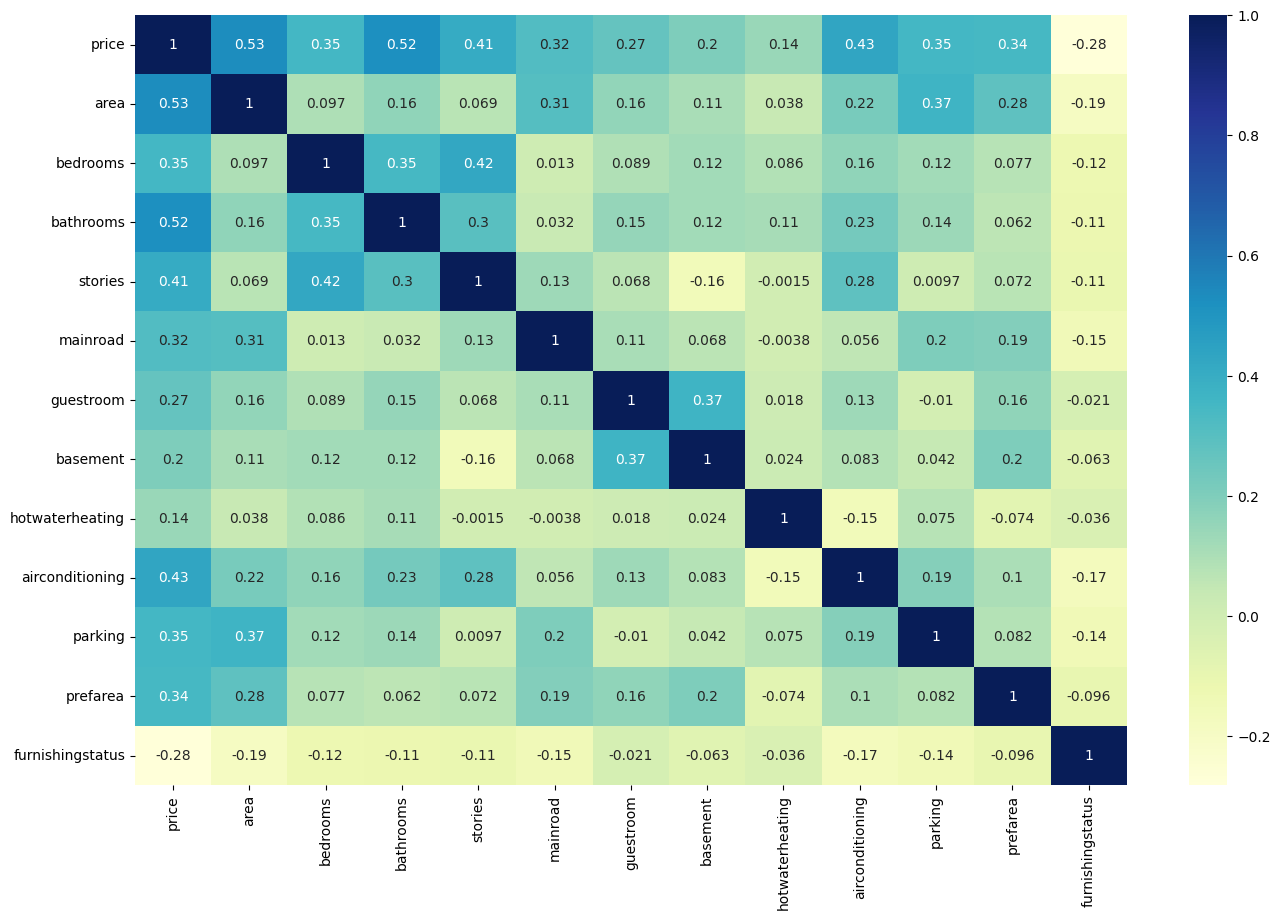

In [ ]:
#checking correlation coefficients to see which variable are hihgly correlated
#using heatmap

plt.figure(figsize = (16,10))
sb.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

PART 3

Regression Model Development

In [ ]:
#dividing X and Y sets for model building
y_train = df_train.pop('price')
X_train = df_train

In [ ]:
#using RFE with linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [ ]:
#running RFE
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 2),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 3),
 ('guestroom', False, 5),
 ('basement', False, 6),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 4),
 ('prefarea', True, 1),
 ('furnishingstatus', False, 7)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'parking',
       'furnishingstatus'],
      dtype='object')

In [ ]:
#building model using statsmodel, for more detailed stats
#creating X_Test df with rfe selected variables
X_train_rfe = X_train[col]

In [ ]:
#adding constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
#run linear model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [ ]:
#print summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     106.7
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           6.98e-78
Time:                        04:18:59   Log-Likelihood:                 353.86
No. Observations:                 381   AIC:                            -693.7
Df Residuals:                     374   BIC:                            -666.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0659      0.010     

In [ ]:
#calculate the vif (variance inflation factors) that affects the regression result
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.24
5,airconditioning,1.20
2,bathrooms,1.16
3,stories,1.16
1,area,1.15
6,prefarea,1.10
4,hotwaterheating,1.06


In [ ]:
#check if error terms are normally distributed
y_train_price = lm.predict(X_train_rfe)
res = (y_train_price - y_train)

Text(0.5, 0, 'Errors')

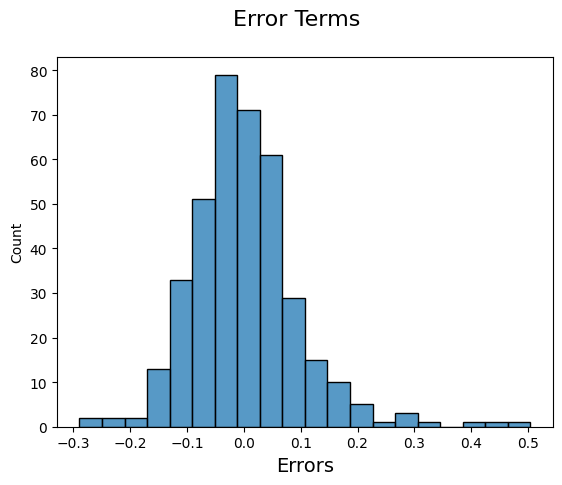

In [ ]:
#plot histogram to see error terms
fig = plt.figure()
sb.histplot((y_train - y_train_price), bins=20)
fig.suptitle('Error Terms', fontsize = 16)
plt.xlabel('Errors', fontsize = 14)

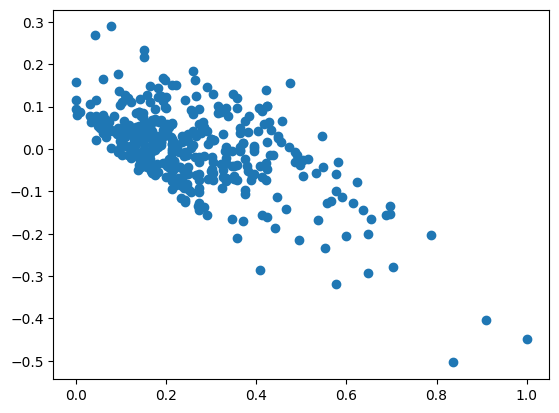

In [ ]:
#scatter plot
plt.scatter(y_train,res)
plt.show()

PART 4

Model Evaluation

In [ ]:
#model evaluation
#apply scaling on test sets

In [ ]:
num_vars = ['area', 'stories', 'bathrooms', 'airconditioning', 'prefarea', 'parking', 'price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
#divide x_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
#adding constant variable
X_test = sm.add_constant(X_test)

In [ ]:
#make prediction
#create new x_test_new df by dropping variables from x_test
X_test_rfe = X_test[X_train_rfe.columns]

In [ ]:
#making prediction
y_pred = lm.predict(X_test_rfe)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5350445027578827

Text(0, 0.5, 'y_pred')

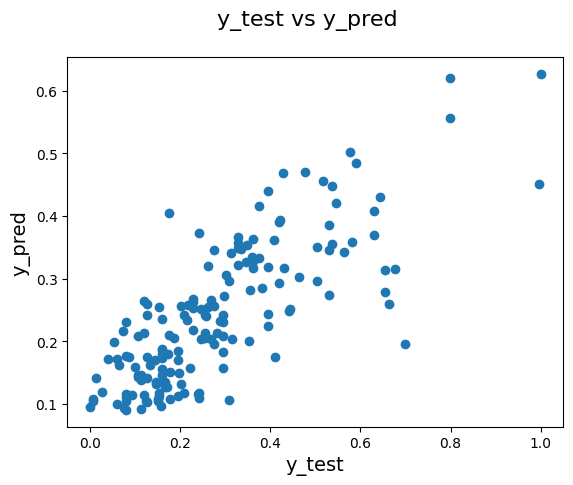

In [ ]:
#creating a scatterplot of real test values and predicted values 
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=16)
plt.xlabel('y_test', fontsize=14)
plt.ylabel('y_pred', fontsize=14)

In [ ]:
#calculate metrics
print(metrics.mean_absolute_error(y_test, y_pred)) #mae
print(metrics.mean_squared_error(y_test, y_pred)) #mse
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #rmse

0.08892810139566772
0.016780094689736003
0.12953800480838049
